In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import os

pd.set_option("display.max_rows", 300)

In [ ]:
# zipmap.net/California/Santa_Clara_County.html
# sunnyvale - 94085, 94086, 94087, 94089
# cupertino - 95014
# los altos - 94024, 94022
# saratoga - 95070
# redwood city - 94063, 94061
## added on 5/18
# santa clara - 95050, 95051, 95128
# west san jose - 95129
# campell - 95117

In [9]:
df = pd.DataFrame(columns = ['zipcode','address', 'listing_type', 'price', 'num_bds', 'num_ba', 'sqft_num', 'details', 'url'])

for filename in os.listdir('data'):
    if filename == ".DS_Store": continue
    data = pd.read_csv(f'data/{filename}', index_col=0)
    data['date'] = datetime.strptime(filename[7:-4], '%Y-%m-%d')
    for idx in data.index:
        if data.loc[idx, 'zipcode'] in [94085, 94086, 94087, 94089]:
            data.loc[idx, 'city'] = 'Sunnyvale'
        elif data.loc[idx, 'zipcode'] in [95014]:
            data.loc[idx, 'city'] = 'Cupertino'
        elif data.loc[idx, 'zipcode'] in [94024, 94022]:
            data.loc[idx, 'city'] = 'Los Altos'
        elif data.loc[idx, 'zipcode'] in [95070]:
            data.loc[idx, 'city'] = 'Saratoga'
        elif data.loc[idx, 'zipcode'] in [94063, 94061]:
            data.loc[idx, 'city'] = 'Redwood City'
        elif data.loc[idx, 'zipcode'] in [95050, 95051, 95128]:
            data.loc[idx, 'city'] = 'Santa Clara'
        elif data.loc[idx, 'zipcode'] in [95129]:
            data.loc[idx, 'city'] = 'West San Jose'
        elif data.loc[idx, 'zipcode'] in [95117]:
            data.loc[idx, 'city'] = 'Campell'
        else: data.loc[idx, 'city'] = np.nan
    df = pd.concat([df, data], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [74]:
df['price_float'] = df['price'].str.replace('[$,+(Est.)]', '')
df['price_float'] = df['price_float'].str.replace('--', '0')
df['price_float'] = df['price_float'].astype(float)

In [75]:
df['sqft_num_float'] = df['sqft_num'].str.replace(',', '')
df['sqft_num_float'] = df['sqft_num_float'].str.replace('--', '0')
df['sqft_num_float'] = df['sqft_num_float'].str.strip()
df['sqft_num_float'] = df['sqft_num_float'].astype(float)

In [76]:
def price_diff(group):
    prices = group.sort_values('date')[['date', 'price_float']]
    return pd.DataFrame({'price': prices.price_float[1:] - prices.price_float[:-1], 
                         'date': prices.date[1:]})
df.groupby(['address', 'zipcode']).apply(price_diff).reset_index().price.unique()

array([ 0., nan])

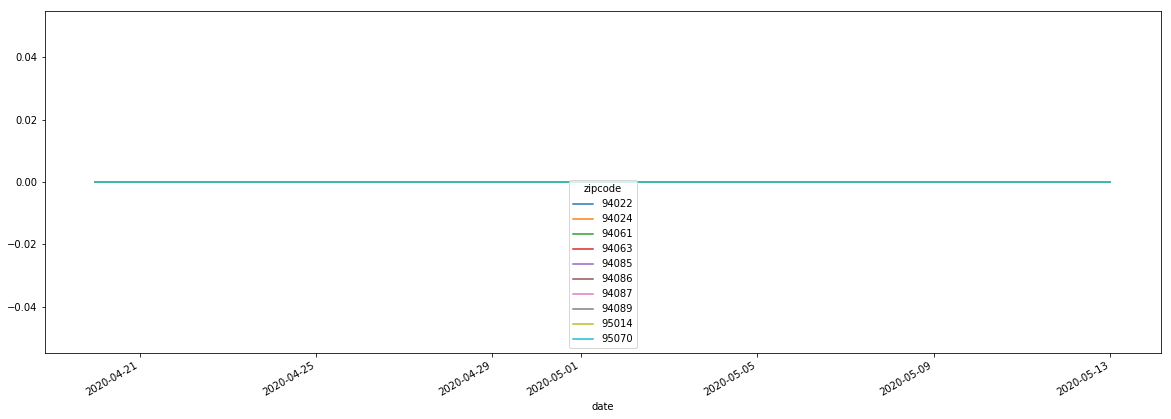

In [77]:
def price_diff(group):
    prices = group.sort_values('date')[['date', 'price_float']]
    return pd.DataFrame({'price': prices.price_float[1:] - prices.price_float[:-1], 
                         'date': prices.date[1:]})
price_diff_df = df.groupby(['address', 'zipcode']).apply(price_diff).reset_index().dropna()
price_diff_df.pivot_table(values='price', index=['date'], columns=['zipcode'], aggfunc=np.mean, fill_value=0).plot(figsize=(20,7))
plt.show()

In [78]:
df['price/sqrt'] = df['price_float']/df['sqft_num_float']

In [79]:
agg_result = df.groupby(['zipcode', 'date', 'listing_type'])['price/sqrt'].agg(['mean', 'count'])

In [80]:
pd.pivot_table(df, values='price/sqrt', index=['zipcode', 'listing_type'],columns=['date'],
                    aggfunc=np.mean, fill_value=0).reset_index()

date,zipcode,listing_type,2020-04-19 00:00:00,2020-04-20 00:00:00,2020-04-21 00:00:00,2020-04-22 00:00:00,2020-04-23 00:00:00,2020-04-25 00:00:00,2020-04-26 00:00:00,2020-04-27 00:00:00,...,2020-05-03 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,2020-05-10 00:00:00,2020-05-11 00:00:00,2020-05-12 00:00:00,2020-05-13 00:00:00
0,94022,Auction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,94022,Condo for sale,1237.449049,1237.449049,1237.449049,1237.449049,1237.449049,1237.449049,1237.449049,1237.449049,...,1303.804348,1303.804348,1183.398237,1070.711819,1070.711819,1070.711819,1074.571665,995.463884,995.463884,995.463884
2,94022,House for sale,1646.875473,1646.875473,1659.846732,1656.088162,1660.870328,1640.990634,1619.811127,1436.555669,...,1641.549667,1681.236334,1647.702485,1391.012316,1443.415770,1400.252542,1400.252542,1461.478332,1388.197863,1369.138880
3,94022,New construction,1477.978382,1477.978382,1483.291460,1483.291460,1468.088811,1468.088811,1468.088811,1468.088811,...,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811,1468.088811
4,94022,Pre-foreclosure,1419.134675,1417.252476,1417.252476,1416.190845,1416.190845,1416.190845,1413.839624,1413.839624,...,1412.145884,1411.735152,1409.654178,1409.654178,1494.776238,1494.776238,1494.637718,1298.417883,1127.312562,1127.312562
5,94022,Pre-foreclosure / Auction,1082.816005,1082.858292,1082.858292,1083.479455,1083.479455,1083.479455,1076.679893,1076.679893,...,1071.774815,1071.911080,1072.404721,1072.404721,1072.697936,1072.697936,1072.625270,1072.302654,1072.806937,1072.806937
6,94022,Townhouse for sale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163,1082.908163
7,94024,House for sale,1241.286647,1247.990969,1247.990969,1253.889615,1244.622038,1245.190902,1245.190902,1241.427751,...,1277.405263,1272.820790,1270.167323,1269.127441,1273.464208,1269.811923,1275.271260,1286.237521,1283.646881,1282.860020
8,94024,Coming soon,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,...,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419,1209.677419
9,94061,Condo for sale,791.037270,791.037270,791.037270,791.037270,791.037270,791.037270,791.037270,791.037270,...,829.635975,829.635975,829.635975,772.215978,797.318237,797.318237,797.318237,797.318237,837.662587,837.662587


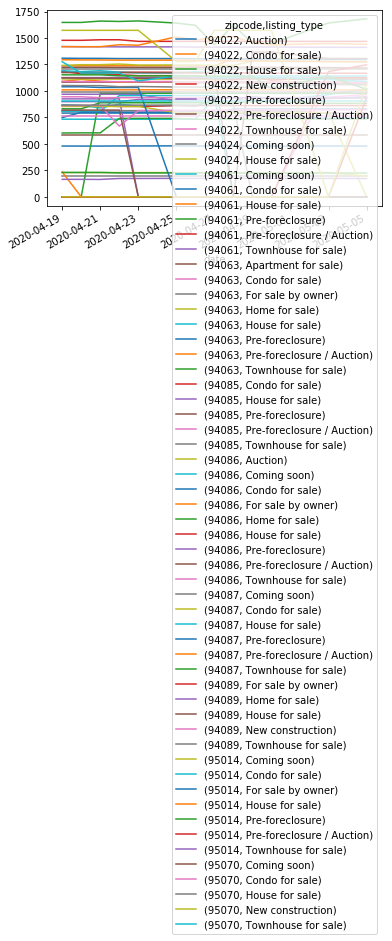

In [16]:
pd.pivot_table(df, values='price/sqrt', index=['date'],columns=['zipcode', 'listing_type'],
                    aggfunc=np.mean, fill_value=0).plot()

In [17]:
zipcodes = df.zipcode.unique()
plot_column_num = 3

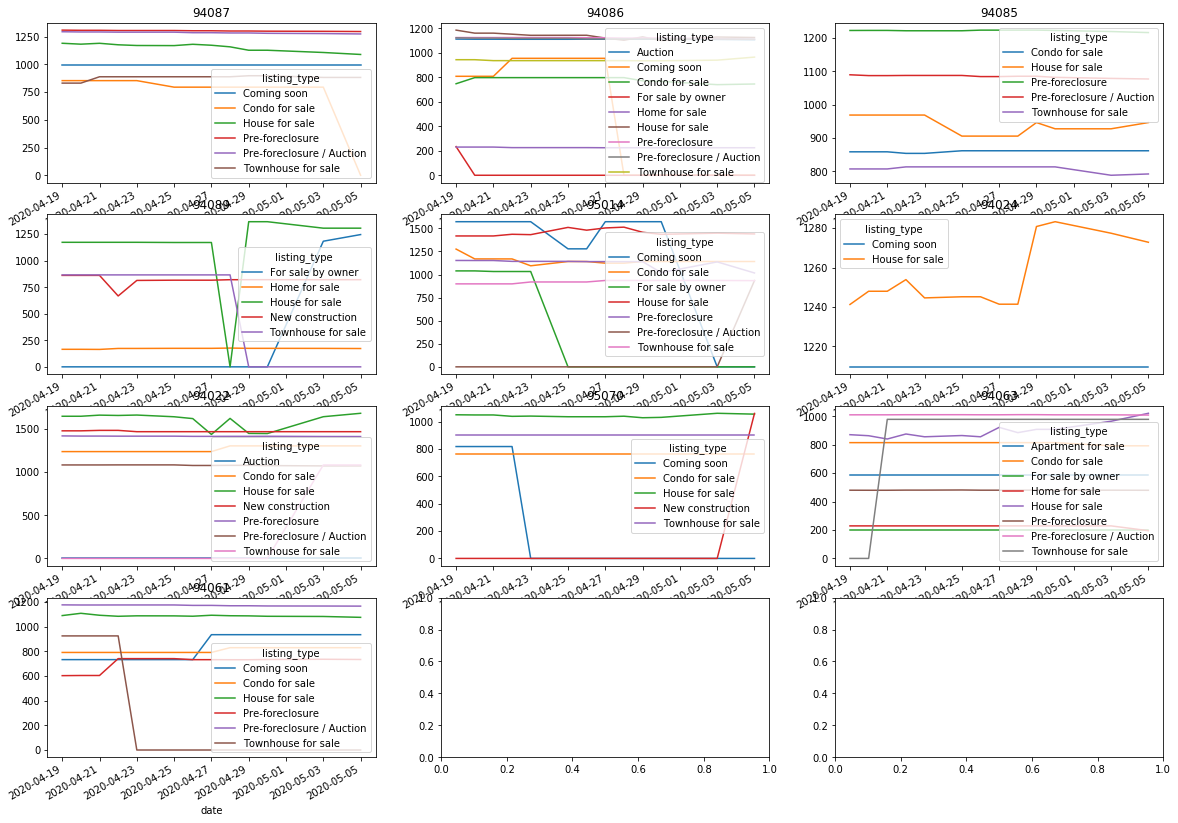

In [19]:
fig, axs = plt.subplots(len(zipcodes)//plot_column_num + 1, plot_column_num, figsize=(20,15))
for idx, zipcode in enumerate(zipcodes):
    ax = axs[idx//plot_column_num][idx%plot_column_num]
    df_zip = df[df.zipcode==zipcode]
    df_zip.pivot_table(values='price/sqrt', index=['date'], columns=['listing_type'],
                    aggfunc=np.mean, fill_value=0).plot(ax=ax)
    ax.set_title(zipcode)